- 1 input y a vector of dimention n 
- 2 sort y in ascending order and set i = n-1 
- 3 compute ti = sum(yj -1)/n-i 
     - if ti>= yi , te = ti go to 5
     - else i--
        - if i>=1 goto 3
        - if i=0 goto 4
- 4 te = sum(yj - 1)/n
- 5 x=(y-te)


<b> this programe will calculate the projection of a point to a simplex

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Sorting function
def sorting_y(y):
    return np.sort(y)

# Calculate ti
def calculate_ti(y, i):
    n = len(y)
    sum_val = 0
    for j in range(i, n):
        sum_val += y[j]
    sum_val -= 1
    return (sum_val / (n - i))

# Calculate te (step 4)
def calculate_te_step4(y):
    return calculate_ti(y, 0)

# Step 3 logic: return te
def Step3(y, i):
    while i >= 0:
        ti = calculate_ti(y, i)
        if ti >= y[i]:
            return ti
        i -= 1
    # If we reach i = -1, calculate te using step 4
    return calculate_te_step4(y)

# Step 5 logic: apply the final te to get the projected values
def step5(y, te):
    return [max(yi - te, 0) for yi in y]  # Ensure non-negativity by using max

# The main algorithm function
def algo(y):
    y_OG = y.copy()  # Copy the original y to apply te later
    ysorted = sorting_y(y.copy())
    n = len(y)
    i = n - 1
    
    # Compute te
    te = Step3(ysorted, i)
    
    # Return the projection
    result = step5(y_OG, te)
    
    # Normalize to ensure sum(result) = 1
    total = np.sum(result)
    return np.array(result) / total if total != 0 else result



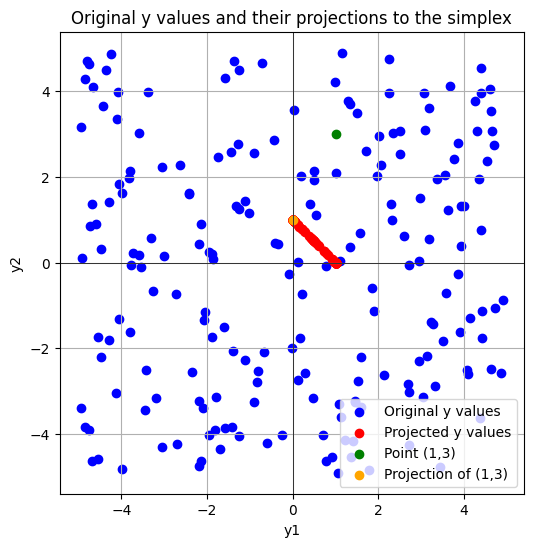

In [53]:

# Generate 20 random y values in R2
np.random.seed(42)  # For reproducibility
ys = (np.random.rand(200, 2)-0.5) * 10  # Random values centered around 0 and scaled in R2

# Project each y onto the simplex
projections = np.array([algo(y) for y in ys])

# Set a specific point for testing and its projection
point = [1, 3]
proj = algo(point)

# Plot the original y values and their projections
plt.figure(figsize=(10, 6))
plt.scatter(ys[:, 0], ys[:, 1], color='blue', label='Original y values')
plt.scatter(projections[:, 0], projections[:, 1], color='red', label='Projected y values')
plt.scatter(point[0], point[1], color='green', label='Point (1,3)')
plt.scatter(proj[0], proj[1], color='orange', label='Projection of (1,3)')

# Set equal scaling for both axes
plt.gca().set_aspect('equal', adjustable='box')

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title("Original y values and their projections to the simplex")
plt.xlabel("y1")
plt.ylabel("y2")
plt.legend()
plt.grid(True)
plt.show()